In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import interfacemetrics as intm
import interfacemetricsplots as intmp
import folderparser as fp
import folderscraper as fs
from plot_line import *
from plot_pic import *
from plot_steady import *
from plot_slices import *
from plot_metrics import *

In [3]:
cfolder = r'C:\Users\lmf1\Documents\OpenFOAM'
efolder = r'E:\Leanne\OpenFOAM'
serverfolder = r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\yieldingsweep\HBHByielded'
TOPFOLDERS = [os.path.join(efolder, 'HBHByielded', s) for s in ['k', 'n', 'tau0']]
EXPORTFOLDER=r'C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots'

# Generating files

In [9]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in os.listdir(topfolder):
        ffull = os.path.join(topfolder, f)
        try:
            fs.populate(ffull)
        except:
            pass
        else:
            l = fp.legendUnique(ffull)
            if len(l)>0:
                o.append(l)
p = pd.DataFrame(o)
p.to_csv(r'C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\yielding_legend_general.csv')

In [43]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, True)

E:\Leanne\OpenFOAM\HBHByielded\k\nb1000
No slices recorded in  E:\Leanne\OpenFOAM\HBHByielded\k\nb1000
E:\Leanne\OpenFOAM\HBHByielded\k\nb1001
No slices recorded in  E:\Leanne\OpenFOAM\HBHByielded\k\nb1001
E:\Leanne\OpenFOAM\HBHByielded\k\nb1002
No slices recorded in  E:\Leanne\OpenFOAM\HBHByielded\k\nb1002
E:\Leanne\OpenFOAM\HBHByielded\k\nb1003
No slices recorded in  E:\Leanne\OpenFOAM\HBHByielded\k\nb1003
E:\Leanne\OpenFOAM\HBHByielded\k\nb1004
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1004\sliceSummaries.csv
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1004\steadyTimes.csv
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1004\steadyPositions.csv
E:\Leanne\OpenFOAM\HBHByielded\k\nb1005
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1005\sliceSummaries.csv
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1005\steadyTimes.csv
    Exported E:\Leanne\OpenFOAM\HBHByielded\k\nb1005\steadyPositions.csv
E:\Leanne\OpenFOAM\HBHByielded\k\nb1006
    Exported E:\Leanne\OpenFOAM\HBHByiel

In [44]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        fs.populate(folder)

# Plots

In [55]:
{'nuink':nuink, 'tau0ink':tau0ink, 'kink':kink, 'nink':nink, 'nusup':nusup, 'tau0sup':tau0sup, 'ksup':ksup, 'nsup':nsup, 'sigma':sigma}

Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\pics_y_umag_t0.5_sigma_0_k_6


Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\names_k_xvar_kinkxksup_yvar_ksupdivkinkxnink_split_True


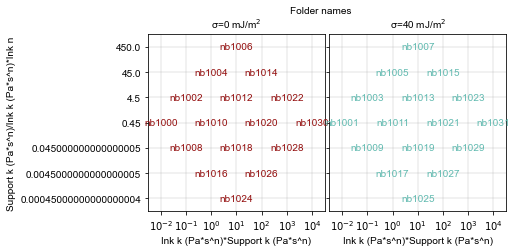

In [36]:
txtPlots0(TOPFOLDERS[0], EXPORTFOLDER, xvar='kink*ksup', yvar='ksup/kink*nink', split=True, overwrite=True)

Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\simrate_k_xvar_kink_yvar_ksup
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\runtime_k_xvar_kink_yvar_ksup
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\arean_5_t_2.5_k_xvar_kink_yvar_ksup_split_True_sigmalist_[0, 40]_tmin_0.7_tmax_1.8
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\vertdispn_5_t_2.5_k_xvar_kink_yvar_ksup_split_True_sigmalist_[0, 40]_tmin_0_tmax_1
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\aspectratio_5_t_2.5_k_xvar_kink_yvar_ksup_split_True_sigmalist_[0, 40]_tmin_0.6_tmax_1.7
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\speeddecay_5_t_2.5_k_xvar_kink_yvar_ksup_split_True_sigmalist_[0, 40]_tmin_0.5_tmax_1.0
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yie

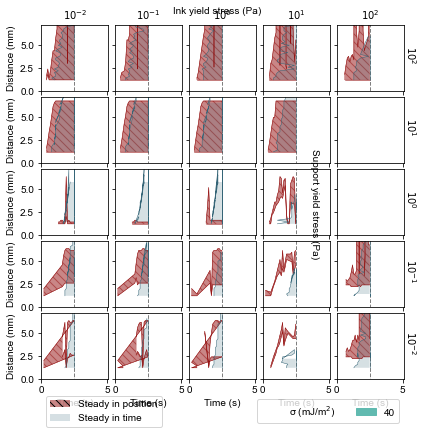

In [45]:
for i, TOPFOLDER in enumerate(TOPFOLDERS):
    xvar = os.path.basename(TOPFOLDER)+'ink'
    yvar = os.path.basename(TOPFOLDER)+'sup'
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
        
    xposition = 5
    for t in [2.5]:
        for s in [['arean', 0.7, 1.8], ['vertdispn', 0, 1], ['aspectratio', 0.6, 1.7], ['speeddecay', 0.5, 1.0]]:
            metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar=xvar, yvar=yvar, split=True, sigmalist=[0,40], overwrite=True, tmin=s[1], tmax=s[2])
            
    for t in [1, 2.5]:
        for sigma in [0, 40]:
            for ta in ['y_umag', 'y_viscy', 'y_uslicey', 'x_uslicex', 'x_viscx']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=True)
    
    for t in [2.5]:
        xposition = 5
        XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, [0, 40], xvar=xvar, yvar=yvar, overwrite=True)
    
    for sigma in [0, 40]:
        imsize=1.3
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar, overwrite=True)

Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\names_k_6
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\simrate_k_6
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\k\runtime_k_6
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\n\names_n_7
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\n\simrate_n_7
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\n\runtime_n_7
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\tau0\names_tau0_8
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\tau0\simrate_tau0_8
Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\yieldingsweep\plots\tau0\runtime_tau0_8


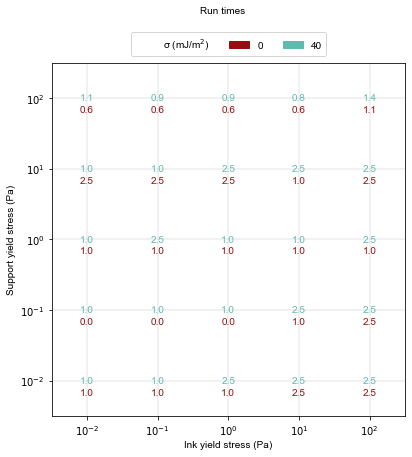

In [51]:
for i in range(3):
    txtPlots0(TOPFOLDERS[i], EXPORTFOLDER, 6+i, overwrite=True)
    timePlots(TOPFOLDERS[i], EXPORTFOLDER, 6+i, overwrite=True)
    runtimePlots0(TOPFOLDERS[i], EXPORTFOLDER, 6+i, overwrite=True)

Exported  C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\plots\stability_nb37_t_2.5_x_3


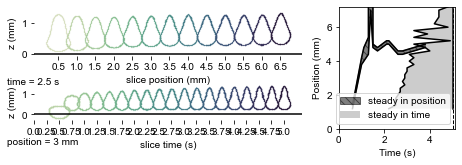

In [113]:
stabilityPlot(os.path.join(TOPFOLDERS[2], 'nb37'), EXPORTFOLDER, 2.5, 3, export=True)

In [20]:
import pandas as pd
metrics = []
for TOPFOLDER in TOPFOLDERS:
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
df = pd.DataFrame(metrics)
df

,arean,vertdispn,aspectratio,speeddecay
0,1.080213,0.027164,0.933362,0.979924
1,1.066118,0.060415,0.941748,0.974603
2,1.137624,-0.011575,0.959221,0.973027
3,1.047905,0.067546,0.961754,0.978674
4,1.047980,0.068275,0.960322,0.978976
...,...,...,...,...
246,1.025508,0.378313,0.926318,0.983788
247,1.022781,0.418051,0.648049,0.988961
248,1.026567,0.378376,0.926376,0.983510
249,1.021736,0.419964,0.653682,0.989587


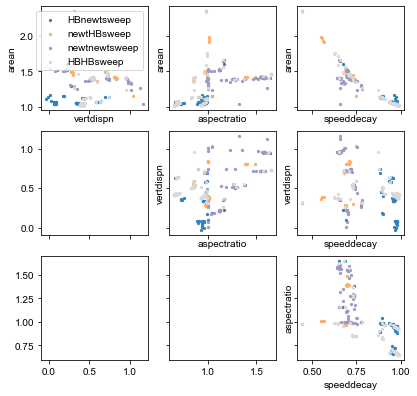

In [67]:
fig, axs = plt.subplots(nrows=3, ncols=3,sharex='col', sharey='row',figsize=(6.5,6.5))
cmap = plt.get_cmap('tab20c')

for t in range(len(TOPFOLDERS)):
    TOPFOLDER = TOPFOLDERS[t]
    metrics = []
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
    df = pd.DataFrame(metrics)

    df2 = df[df['arean']<3]
    df2 = df2[df2['vertdispn']>-0.1]
    df2 = df2[df2['vertdispn']<1.2]
    df2 = df2[df2['speeddecay']<1.1]

    slist = df.keys()
    for i in range(4):
        for j in range(i):
            color = cmap(t/3)
            if j==0 and i==1:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color, label=os.path.basename(TOPFOLDER))
            else:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color)
            axs[j,i-1].set_xlabel(slist[i])
            axs[j,i-1].set_ylabel(slist[j])
axs[0,0].legend()
